# CSCI-537 Final Project
# CAPTCHA Solver
### Fall 2021
### Hayden Sather, Jake Pinkston

### TO RUN: Extract the data directory to the project directory

In [1]:
import os

import cv2
import matplotlib.pyplot as plt
import numpy as np

import global_params as gp
import helper_funcs as hf

In [2]:
model = hf.get_model(retrain=False)

2021-12-10 18:37:26.190212: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-10 18:37:26.237783: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2021-12-10 18:37:26.237800: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2021-12-10 18:37:26.238270: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN

# Run all CAPTCHA images

In [34]:

run_all = False
if run_all:
    all_correct = []
    all_wrong = []
    agg_correct = 0
    num_total = 0
    correct_dict = {}
    wrong_dict = {}
    for filename in os.listdir("data"):
        img_path = os.path.join("data", filename)
        img = cv2.imread(img_path)

        true_captcha = filename[:-4]
        true_captcha = hf.transform_string(true_captcha)
    
        predicted_captcha = hf.read_captcha(img, model)
        if predicted_captcha is None:
            continue
        predicted_captcha = hf.transform_string(predicted_captcha)
    
        percent_correct = hf.similar(true_captcha, predicted_captcha)

        if percent_correct == 100:
            all_correct.append(img)
        if percent_correct == 0:
            all_wrong.append(img)

        for correct_char, predicted_char in zip(true_captcha, predicted_captcha):
            if correct_char == predicted_char:
                if correct_char in correct_dict:
                    correct_dict[correct_char] += 1
                else:
                    correct_dict[correct_char] = 1
            else:
                if correct_char in wrong_dict:
                    wrong_dict[correct_char] += 1
                else:
                    wrong_dict[correct_char] = 1

        agg_correct += percent_correct
        num_total += 1

    print(f"Total Percent Correct: {agg_correct / num_total}\n")

Total Percent Correct: 73.43393277268503



# Find accuracies and false positives of characters

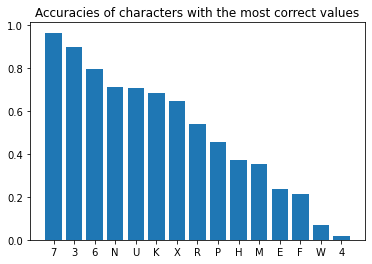

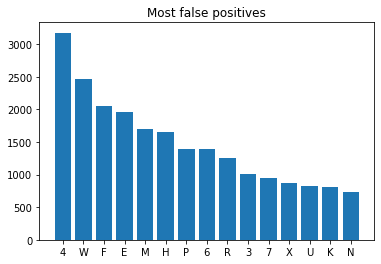

In [65]:
calc_accuracies = False
if calc_accuracies:
    counts_dict = {}
    for char in set(gp.CHAR_MAPPING.values()):
        counts_dict[char] = list(gp.CHAR_MAPPING.values()).count(char)

    def plot_dict(dictionary, title, norm=True):
        for key in dictionary:
            if key in counts_dict:
                dictionary[key] /= (counts_dict[char] + 1)

        chars = list(dictionary.keys())
        counts = list(dictionary.values())

        zipped_lists = zip(counts, chars)
        sorted_pairs = sorted(zipped_lists, reverse=True)

        sorted_pairs = zip(*sorted_pairs)
        counts, chars = (list(pair) for pair in sorted_pairs)

        counts = np.array(counts)
        # Normalize for counts
        if norm:
            counts = counts / (num_total * 9 / (26 + 10))

        num_accuracies = 15
        plt.bar(chars[:num_accuracies], counts[:num_accuracies])
        plt.title(title)
        plt.show()

    plot_dict(correct_dict, "Accuracies of characters with the most correct values")
    plot_dict(wrong_dict, "Most false positives", False)